In [4]:
from numpy import *
from keras.layers import *
from keras.utils import *

In [5]:
from os import *

In [18]:
x=listdir('chest_xray/train/')

In [19]:
x

['NORMAL', 'PNEUMONIA']

In [20]:
train=[]
label=[]

In [21]:
for i in listdir('chest_xray/train/'):
    x='chest_xray/train/'+i+'/'
    for j in listdir(x):
        img=load_img(x+j,target_size=(100,100))
        train.append(img_to_array(img))
        if i=='NORMAL':
            label.append(0)
        else:
            label.append(1)

In [ ]:
img=load_img('chest_xray\train\NORMAL\NORMAL2-IM-1371-0001.jpeg',target_size=(100,100))

In [ ]:
img

In [22]:
train[0]

array([[[22., 22., 22.],
        [18., 18., 18.],
        [25., 25., 25.],
        ...,
        [94., 94., 94.],
        [93., 93., 93.],
        [93., 93., 93.]],

       [[19., 19., 19.],
        [20., 20., 20.],
        [14., 14., 14.],
        ...,
        [96., 96., 96.],
        [93., 93., 93.],
        [90., 90., 90.]],

       [[20., 20., 20.],
        [19., 19., 19.],
        [15., 15., 15.],
        ...,
        [94., 94., 94.],
        [91., 91., 91.],
        [88., 88., 88.]],

       ...,

       [[29., 29., 29.],
        [29., 29., 29.],
        [29., 29., 29.],
        ...,
        [21., 21., 21.],
        [23., 23., 23.],
        [24., 24., 24.]],

       [[30., 30., 30.],
        [27., 27., 27.],
        [27., 27., 27.],
        ...,
        [44., 44., 44.],
        [47., 47., 47.],
        [46., 46., 46.]],

       [[38., 38., 38.],
        [36., 36., 36.],
        [36., 36., 36.],
        ...,
        [86., 86., 86.],
        [88., 88., 88.],
        [91., 91., 91.]]

In [23]:
train=array(train)

In [24]:
from matplotlib.pyplot import *

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


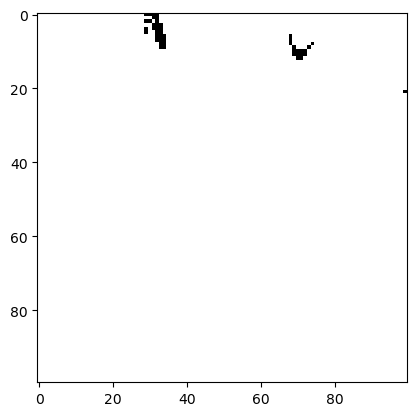

In [25]:
imshow(train[0])

In [26]:
train.shape

(5216, 100, 100, 3)

In [27]:
train=train.reshape(5216,100*100*3)

In [28]:
train=train/255

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,label,test_size=0.2,stratify=label)

In [30]:
y_train=to_categorical(y_train)

In [ ]:
from keras import *
model=Sequential([
    Dense(512,activation='relu',input_shape=(30000,)),
    Dense(2,activation='softmax')
])
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [ ]:
model.fit(x_train,y_train,epochs=15)

In [ ]:
model.summary()

In [ ]:
model.evaluate(x_test,to_categorical(y_test))

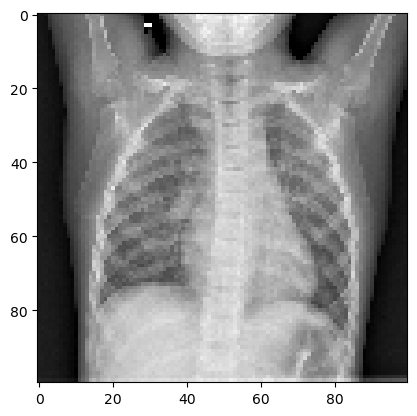

In [31]:
from matplotlib.pyplot import imshow
imshow(train[0].reshape(100,100,3))

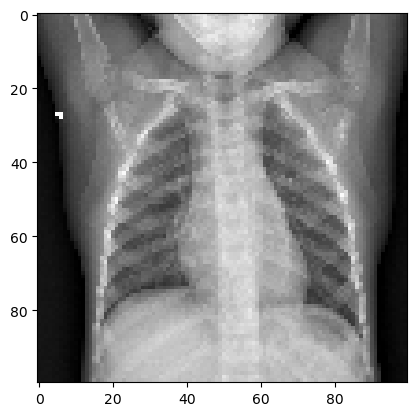

In [32]:
imshow(train[115].reshape(100,100,3))

In [34]:
from keras import *
model1=Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(pool_size=(2,2)),
     Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(2,activation='softmax')
])
model1.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [35]:
x_train=x_train.reshape(4172,100,100,3)

In [36]:
x_train.shape

(4172, 100, 100, 3)

In [37]:
model1.fit(x_train,y_train,epochs=15)

Epoch 1/15
131/131 [==============================] - 48s 345ms/step - loss: 0.2732 - accuracy: 0.9075
Epoch 2/15
131/131 [==============================] - 45s 341ms/step - loss: 0.0931 - accuracy: 0.9650
Epoch 3/15
131/131 [==============================] - 45s 342ms/step - loss: 0.0640 - accuracy: 0.9779
Epoch 4/15
131/131 [==============================] - 44s 336ms/step - loss: 0.0625 - accuracy: 0.9765
Epoch 5/15
131/131 [==============================] - 45s 340ms/step - loss: 0.0581 - accuracy: 0.9770
Epoch 6/15
131/131 [==============================] - 45s 340ms/step - loss: 0.0307 - accuracy: 0.9897
Epoch 7/15
131/131 [==============================] - 44s 337ms/step - loss: 0.0229 - accuracy: 0.9919
Epoch 8/15
131/131 [==============================] - 44s 337ms/step - loss: 0.0138 - accuracy: 0.9957
Epoch 9/15
131/131 [==============================] - 44s 337ms/step - loss: 0.0073 - accuracy: 0.9974
Epoch 10/15
131/131 [==============================] - 44s 339ms/step - l

In [39]:
model1.save('arun')

INFO:tensorflow:Assets written to: arun\assets


INFO:tensorflow:Assets written to: arun\assets
